# Regresja GridSearchCV dla modelu kNN (dla różnych ilości cech(x) i znaleźć najlepsze parametry)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/pawcio/Desktop/Projekty/insurance_3.csv')

In [3]:
x = np.array(df['bmi'])
y = np.array(df['charges'])

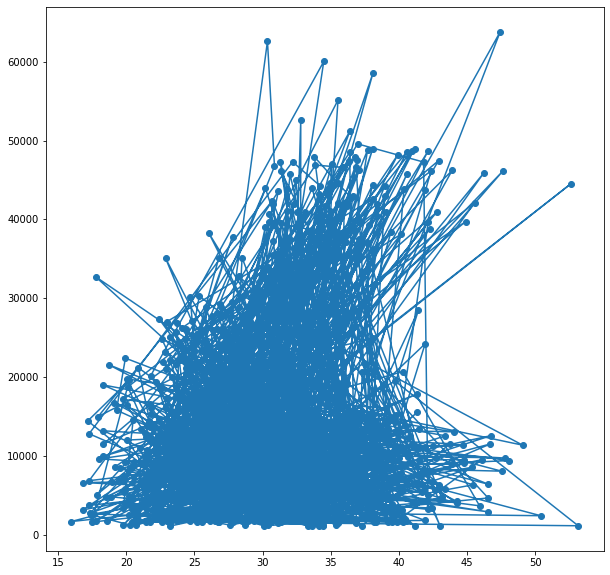

In [4]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y, marker='o')

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
model.fit(x, y)
print('Wartość dopasowania: ', model.score(x,y))

Wartość dopasowania:  0.03933913991786253


In [7]:
b = model.intercept_[0]
b

1192.9372089611516

In [8]:
a = model.coef_[0]
a

array([393.8730308])

In [9]:
def linearFunction(a, b, x):
    return a*x+b

In [10]:
x_reg = x
y_reg = linearFunction(a,b,x_reg)

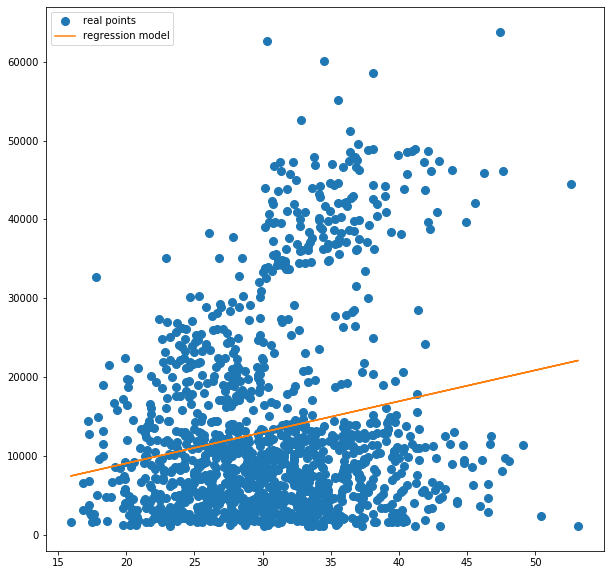

In [11]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, linestyle='none', marker='o', markersize=8, label='real points')
plt.plot(x_reg, y_reg,  label='regression model')
plt.legend()

In [12]:
# Obliczam R^2
from sklearn.metrics import r2_score

In [13]:
print('R^2: ', r2_score(y,y_reg))

R^2:  0.03933913991786253


# Klasyfikacja

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [18]:
def klasyfikacja(x,y):
    print('Klasyfikacja z wykorzystaniem regresji logistycznej')
    print('---------------------')

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)
    print('---------------------')

    reg_model = LogisticRegression().fit(x_train, y_train)
    reg_model_train_sc = reg_model.score(x_train, y_train)
    
    print('Wartość dla zbioru treningowego = ', reg_model_train_sc)
    print('---------------------')

    reg_model_test_sc = reg_model.score(x_test, y_test)
    print('Wartość dla zbioru testowego = ', reg_model_test_sc)
    print('---------------------')

    y_pred_reg_model = reg_model.predict(x_test)
    reg_model_accuracy_sc = accuracy_score(y_test, y_pred_reg_model)
    print('Wartość Accuracy score = ', reg_model_accuracy_sc)
    print('---------------------')

# Treedecision
    print('Klasyfikacja z wykorzystaniem drzewa decyzyjnego')
    print('---------------------')

    tree_model = DecisionTreeClassifier().fit(x_train, y_train)
    tree_model_train_sc = tree_model.score(x_train, y_train)
    print('Wartość dla zbioru treningowego = ', tree_model_train_sc)
    print('---------------------')

    tree_model_test_sc = tree_model.score(x_test, y_test)
    print('Wartość dla zbioru testowego = ', tree_model_test_sc)
    print('---------------------')

    y_pred_tree_model = tree_model.predict(x_test)
    tree_model_accuracy_sc = accuracy_score(y_test, y_pred_tree_model)
    print('Wartość Accuracy score = ', tree_model_accuracy_sc)
    print('---------------------')

    fig = plt.figure(figsize=(10,10))
    plot_tree(tree_model)
        

In [16]:
klasyfikacja(x,y)

Klasyfikacja z wykorzystaniem regresji logistycznej
---------------------
---------------------


/home/pawcio/miniconda3/envs/nowe_srodowisko_condy/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'